In [15]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [16]:
def Load_Image(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

In [17]:
natural_images = Load_Image('./dataset/natural_training')
manmade_images = Load_Image('./dataset/manmade_training')

libpng warning: iCCP: known incorrect sRGB profile


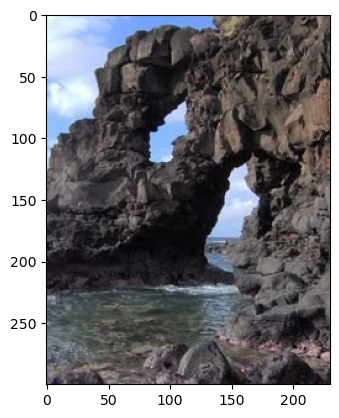

In [18]:
plt.imshow(cv2.cvtColor(natural_images[0], cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
image_size = (64, 64)


image_size = (128, 128)
natural_images = [cv2.resize(img, image_size) for img in natural_images]
manmade_images = [cv2.resize(img, image_size) for img in manmade_images]

natural_labels = [0] * len(natural_images)
manmade_labels = [1] * len(manmade_images)

data = np.concatenate((natural_images, manmade_images), axis=0)
labels = np.concatenate((natural_labels, manmade_labels), axis=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(data.reshape(len(data), -1), labels)

KNeighborsClassifier(n_neighbors=1)

In [21]:
(data.reshape(len(data), -1)).shape

(1000, 49152)

In [22]:
natural_test = Load_Image('./dataset/natural_test')
manmade_test = Load_Image('./dataset/manmade_test')

natural_test = [cv2.resize(img, image_size) for img in natural_test]
manmade_test = [cv2.resize(img, image_size) for img in manmade_test]

natural_test_labels = [0] * len(natural_test)
manmade_test_labels = [1] * len(manmade_test)

In [23]:
data_test = np.concatenate((natural_test, manmade_test), axis=0)
labels_test = np.concatenate((natural_test_labels, manmade_test_labels), axis=0)

y_pred = knn.predict(data_test.reshape(len(data_test), -1))

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(labels_test, y_pred)
report = classification_report(labels_test, y_pred)

In [24]:
accuracy

0.538

In [25]:
print(f"Report: \n{report}")

Report: 
              precision    recall  f1-score   support

           0       0.52      0.94      0.67       250
           1       0.70      0.13      0.22       250

    accuracy                           0.54       500
   macro avg       0.61      0.54      0.45       500
weighted avg       0.61      0.54      0.45       500
